In [172]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import sympy as sp

plt.rcParams['font.size'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = [8,6]

E2) a)

In [173]:
#First we define as few variables
N = 300 #resolution
delta = 2*np.pi/N #Spacing between points

#Defining the phi values, this is essentially our potential
phi = np.linspace(-np.pi, np.pi, N)

cosMatrix = np.diag(np.cos(phi))


diagArr = np.ones(N)
offDiagArr = np.ones(N-1)

nMatrix = -1j/(2*delta) *(np.diag(offDiagArr, k = 1) - np.diag(offDiagArr, k = -1))

n2Matrix = 1/delta**2 * (2*np.diag(diagArr) - np.diag(offDiagArr, k = 1) - np.diag(offDiagArr, k = -1))
n2Matrix[1][N-1], n2Matrix[N-1][1] = -1/delta**2, -1/delta**2  

In [174]:
g = 0.05

def hamiltonian(E_C = 0.2, E_J = 10, phi_e = np.pi):
    E_kin = 4*E_C*n2Matrix
    E_pot = -E_J*np.abs(np.cos(phi_e))*cosMatrix
    return E_kin + E_pot, E_J*np.cos(phi_e)

# E2 b)

In [175]:
dim = 12
transmon, potential = hamiltonian()

transmon_energy, transmon_state = sc.sparse.linalg.eigsh(transmon, k = dim, which = "SA")

omega0 = np.zeros(dim)
omega1 = np.zeros(dim)
g0 = np.zeros(dim)
g1 = np.zeros(dim)

omega01 = transmon_energy[2]-transmon_energy[1]

for i in range(dim-2):
    g0[i] = g**2 * np.abs(transmon_state[:,1]@nMatrix@transmon_state[:,i+1])**2
    g1[i] = g**2 * np.abs(transmon_state[:,2]@nMatrix@transmon_state[:,i+1])**2
    omega0[i] = transmon_energy[i+1]-transmon_energy[1]
    omega1[i] = transmon_energy[i+1]-transmon_energy[2]


def Xi(delta_arr):
    def xi_val(delta):
        Xi_arr = g0* (1/(omega0-omega01+delta) + 1/(omega0-omega01+delta)) - g1 * (1/(omega1-omega01+delta) + 1/(omega1-omega01+delta))
        return np.sum(Xi_arr)
        
    Xi_arr = [xi_val(x) for x in delta_arr]

    return Xi_arr

Text(0, 0.5, '$\\chi$')

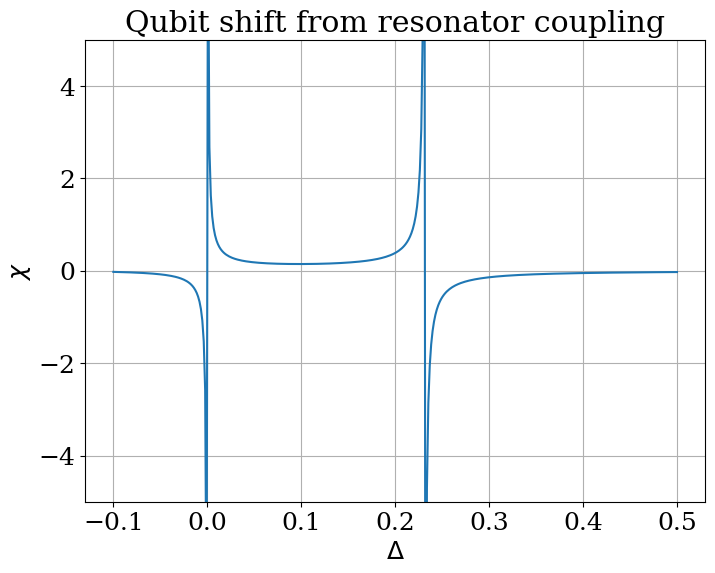

In [176]:
delta_range = np.linspace(-0.1 , 0.5, 400)

Xi_results = Xi(delta_range)

plt.plot(delta_range, Xi_results)
plt.ylim(-5, 5)
plt.title("Qubit shift from resonator coupling")
plt.xlabel(r"$\Delta$")
plt.ylabel(r"$\chi$")